# Prelim

In [218]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt
import utils_dagma

def load_data(n_nodes, seed, version_path):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'{version_path}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'{version_path}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    return B_true, W_est

def get_block(data, n_nodes=20, index=11, extract=None):
    data_dict = {
        11: data[:n_nodes, :n_nodes],
        12: data[:n_nodes, n_nodes:],
        21: data[n_nodes:, :n_nodes],
        22: data[n_nodes:, n_nodes:]
    }
    
    return data_dict[index]

def get_Z(data, n_nodes=20, left=11, right=21, extract=None):
    left_block = get_block(data, n_nodes, left)
    right_block = get_block(data, n_nodes, right)
    res = np.abs(left_block) - np.abs(right_block)
    
    return res

In [171]:
n_nodes = 20
B_true, W_est = load_data(n_nodes, 1, "v34/v20")

# Assumption 0.0: |W11|n >(d) |W21|n, that is, Z_11_21 right distributed
* true

In [98]:
Z11_21 = get_Z(W_est, left=11, right=21)
print((Z11_21[B_true] > 0).sum() / Z11_21[B_true].size)
print((Z11_21[~B_true] > 0).sum() / Z11_21[~B_true].size)

0.9875
0.5375


# Assumption 0.1: for any t, N(Z_11_21_n > t) > N(Z_11_21_n < -t)
* true

In [40]:
q = 0.95
for q in np.arange(1, 0, -5e-3):
    t = np.quantile(np.abs(Z11_21), q)
    print((Z11_21[~B_true] > t).sum() - (Z11_21[~B_true] < -t).sum(), end=' | ')

0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 2 | 2 | 2 | 3 | 3 | 3 | 2 | 2 | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 2 | 2 | 0 | -2 | -2 | -2 | -2 | -1 | 1 | 3 | 5 | 7 | 9 | 11 | 11 | 10 | 12 | 13 | 13 | 11 | 11 | 11 | 9 | 7 | 7 | 7 | 9 | 11 | 11 | 9 | 7 | 7 | 7 | 5 | 5 | 7 | 5 | 3 | 5 | 5 | 5 | 5 | 4 | 4 | 4 | 4 | 4 | 6 | 6 | 6 | 6 | 6 | 4 | 4 | 2 | 2 | 0 | 0 | 0 | 0 | 0 | -2 | -4 | -2 | -2 | 0 | 0 | 0 | 0 | 0 | 0 | 2 | 2 | 2 | 0 | 0 | -2 | 0 | 0 | -2 | -2 | -2 | -2 | -2 | -4 | -2 | 0 | 0 | 2 | 2 | 4 | 4 | 4 | 4 | 2 | 0 | 2 | 4 | 2 | 2 | 2 | 4 | 2 | 4 | 4 | 4 | 6 | 8 | 10 | 11 | 13 | 11 | 11 | 9 | 7 | 8 | 6 | 4 | 6 | 6 | 4 | 6 | 6 | 6 | 6 | 8 | 8 | 10 | 10 | 12 | 14 | 16 | 18 | 18 | 18 | 18 | 20 | 22 | 22 | 24 | 24 | 26 | 26 | 26 | 26 | 26 | 26 | 26 | 26 | 24 | 26 | 24 | 26 | 28 | 26 | 26 | 28 | 28 | 26 | 

# Assumption 1.0: for those |W11|n > |W21|n, most |W^2_11|n > |W^2_21|n , and so on
* true

In [220]:
res = []

In [221]:
W11, W21 = get_block(W_est, index=11), get_block(W_est, index=21)
mask = (np.abs(W11) > np.abs(W21)) & (~B_true)

_res = []
for k in range(2, 10):
    W_est_pow = np.linalg.matrix_power(W_est, k)
    
    W11_pow, W21_pow = get_block(W_est_pow, index=11), get_block(W_est_pow, index=21)
    print(
        (np.abs(W11_pow)[mask] > np.abs(W21_pow)[mask]).sum() / \
        np.abs(W11_pow)[mask].size
    )
    _res.append(
        (np.abs(W11_pow)[mask] > np.abs(W21_pow)[mask]).sum() / \
        np.abs(W11_pow)[mask].size
    )
res.append(_res)

0.8546511627906976
0.8023255813953488
0.7965116279069767
0.7616279069767442
0.7441860465116279
0.686046511627907
0.6686046511627907
0.6511627906976745


In [222]:
W11, W21 = get_block(W_est, index=11), get_block(W_est, index=21)
mask = (np.abs(W11) < np.abs(W21)) & (~B_true)

_res = []
for k in range(2, 10):
    W_est_pow = np.linalg.matrix_power(W_est, k)
    
    W11_pow, W21_pow = get_block(W_est_pow, index=11), get_block(W_est_pow, index=21)
    print(
        (np.abs(W11_pow)[mask] > np.abs(W21_pow)[mask]).sum() / \
        np.abs(W11_pow)[mask].size
    )
    _res.append(
        (np.abs(W11_pow)[mask] > np.abs(W21_pow)[mask]).sum() / \
        np.abs(W11_pow)[mask].size
    )
res.append(_res)

0.6081081081081081
0.5675675675675675
0.6554054054054054
0.581081081081081
0.6283783783783784
0.6148648648648649
0.668918918918919
0.6216216216216216


In [223]:
W11, W21 = get_block(W_est, index=11), get_block(W_est, index=21)
mask = (~B_true)

_res = []
for k in range(2, 10):
    W_est_pow = np.linalg.matrix_power(W_est, k)
    
    W11_pow, W21_pow = get_block(W_est_pow, index=11), get_block(W_est_pow, index=21)
    print(
        (np.abs(W11_pow)[mask] > np.abs(W21_pow)[mask]).sum() / \
        np.abs(W11_pow)[mask].size
    )
    _res.append(
        (np.abs(W11_pow)[mask] > np.abs(W21_pow)[mask]).sum() / \
        np.abs(W11_pow)[mask].size
    )
res.append(_res)

0.740625
0.69375
0.73125
0.678125
0.690625
0.653125
0.66875
0.6375


In [239]:
data_dict = {
    "|W11|n > |W21|n": res[0],
    "|W11|n < |W21|n": res[1],
    "all": res[2]
}
data = pd.DataFrame(data_dict)

In [240]:
data

,|W11|n > |W21|n,|W11|n < |W21|n,all
0,0.854651,0.608108,0.740625
1,0.802326,0.567568,0.693750
2,0.796512,0.655405,0.731250
3,0.761628,0.581081,0.678125
4,0.744186,0.628378,0.690625
5,0.686047,0.614865,0.653125
6,0.668605,0.668919,0.668750
7,0.651163,0.621622,0.637500


Text(0.5, 1.0, 'proportion of |W^2|(11, n) > |W^2|(21, n)')

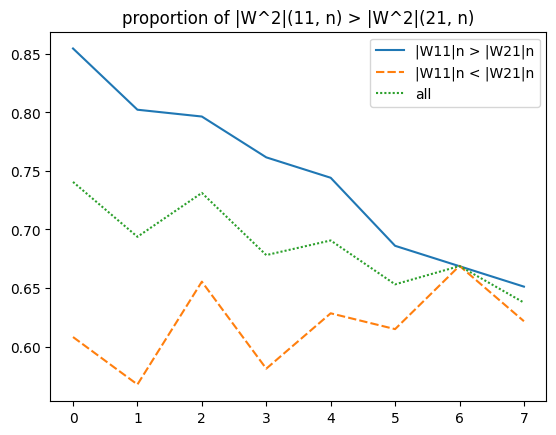

In [242]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data, ax=ax)
ax.set_title("proportion of |W^2|(11, n) > |W^2|(21, n)")

# Assumption 1.1: for those |W^k_11|n > |W^k_21|n, most |W11|n > |W21|n
* true, but not as strong as 1.0

In [251]:
res = []

In [252]:
_res = []
for k in range(2, 10):
    W_est_pow = np.linalg.matrix_power(W_est, k)
    W11_pow, W21_pow = get_block(W_est_pow, index=11), get_block(W_est_pow, index=21)
    mask = (np.abs(W11_pow) > np.abs(W21_pow)) & (~B_true)

    W11, W21 = get_block(W_est, index=11), get_block(W_est, index=21)
    print(
        (np.abs(W11)[mask] > np.abs(W21)[mask]).sum() / \
        np.abs(W11)[mask].size
    )
    _res.append(
        (np.abs(W11)[mask] > np.abs(W21)[mask]).sum() / \
        np.abs(W11)[mask].size
    )
res.append(_res)

0.620253164556962
0.6216216216216216
0.5854700854700855
0.6036866359447005
0.579185520361991
0.5645933014354066
0.5373831775700935
0.5490196078431373


In [253]:
_res = []
for k in range(2, 10):
    W_est_pow = np.linalg.matrix_power(W_est, k)
    W11_pow, W21_pow = get_block(W_est_pow, index=11), get_block(W_est_pow, index=21)
    mask = (np.abs(W11_pow) < np.abs(W21_pow)) & (~B_true)

    W11, W21 = get_block(W_est, index=11), get_block(W_est, index=21)
    print(
        (np.abs(W11)[mask] > np.abs(W21)[mask]).sum() / \
        np.abs(W11)[mask].size
    )
    _res.append(
        (np.abs(W11)[mask] > np.abs(W21)[mask]).sum() / \
        np.abs(W11)[mask].size
    )
res.append(_res)

0.30120481927710846
0.3469387755102041
0.4069767441860465
0.39805825242718446
0.4444444444444444
0.4864864864864865
0.5377358490566038
0.5172413793103449


In [254]:
data_dict = {
    "|W^2|(11, n) > |W^2|(21, n)": res[0],
    "|W^2|(11, n) < |W^2|(21, n)": res[1],
}
data = pd.DataFrame(data_dict)

Text(0.5, 1.0, 'proportion of |W11|n > |W21|')

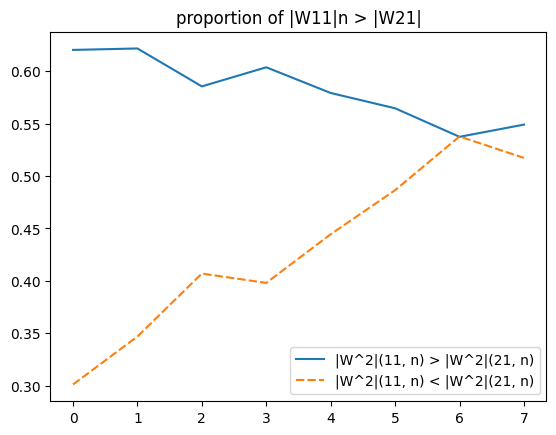

In [255]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data, ax=ax)
ax.set_title("proportion of |W11|n > |W21|")

# Try: Z of |(|W11|n - |W11^2|n)| - |(|W21|n - |W21^2|n)|
* works!

In [111]:
k = 2
W11, W21 = get_block(W_est, index=11), get_block(W_est, index=21)
W_est_pow = 1e-2 * np.linalg.matrix_power(W_est, k)
# W_est_pow = np.linalg.matrix_power(np.abs(W_est), k)
W11_pow, W21_pow = get_block(W_est_pow, index=11), get_block(W_est_pow, index=21)

W11_1 = np.abs(W11) - np.abs(W11_pow)
# W11_1 = W11 - W11_pow
W21_1 = np.abs(W21) - np.abs(W21_pow)
# W21_1 = W21 - W21_pow
# Z = np.abs(W11_1) - np.abs(W21_1)
Z = W11_1 - W21_1
print((Z[B_true] > 0).sum() / Z[B_true].size)
print((Z[~B_true] > 0).sum() / Z[~B_true].size)

0.95
0.496875


# Systematic Try
* works!

In [158]:
def test(n_nodes, seed, version="v34/v20"):
    B_true, W_est = load_data(n_nodes, seed, version)

    k = 2
    W11, W21 = get_block(W_est, n_nodes=n_nodes, index=11), get_block(W_est, n_nodes=n_nodes, index=21)
    W_est_pow = 1e-2 * np.linalg.matrix_power(W_est, k)
    # W_est_pow = np.linalg.matrix_power(np.abs(W_est), k)
    W11_pow, W21_pow = get_block(W_est_pow, n_nodes=n_nodes, index=11), get_block(W_est_pow, n_nodes=n_nodes, index=21)
    
    W11_1 = np.abs(W11) - np.abs(W11_pow)
    # W11_1 = W11 - W11_pow
    W21_1 = np.abs(W21) - np.abs(W21_pow)
    # W21_1 = W21 - W21_pow
    # Z = np.abs(W11_1) - np.abs(W21_1)
    Z = W11_1 - W21_1
    print(
        "true: ",
        (Z[B_true] > 0).sum() / Z[B_true].size
    )
    print(
        "null: ",
        (Z[~B_true] > 0).sum() / Z[~B_true].size
    )
    print("====================")
    

In [159]:
for i in range(1, 11):
    test(20, i)

true:  0.95
null:  0.496875
true:  0.95
null:  0.446875
true:  0.95
null:  0.478125
true:  0.95
null:  0.471875
true:  0.9375
null:  0.453125
true:  0.9625
null:  0.465625
true:  0.95
null:  0.4375
true:  0.925
null:  0.49375
true:  0.95
null:  0.45625
true:  0.95
null:  0.465625


In [139]:
for i in range(1, 11):
    test(n_nodes=40, seed=i, version="v34/v40")

true:  0.9875
null:  0.4638888888888889
true:  0.9875
null:  0.46319444444444446
true:  0.98125
null:  0.4486111111111111
true:  0.98125
null:  0.4131944444444444
true:  0.99375
null:  0.45555555555555555
true:  0.98125
null:  0.4513888888888889
true:  0.9875
null:  0.40625
true:  0.9875
null:  0.4673611111111111
true:  0.98125
null:  0.4673611111111111
true:  0.99375
null:  0.47847222222222224


In [140]:
for i in range(1, 11):
    test(n_nodes=60, seed=i, version="v34/v60")

true:  0.9958333333333333
null:  0.45148809523809524
true:  0.9958333333333333
null:  0.4461309523809524
true:  0.9958333333333333
null:  0.45148809523809524
true:  0.9916666666666667
null:  0.45089285714285715
true:  0.9958333333333333
null:  0.4523809523809524
true:  0.9958333333333333
null:  0.4529761904761905
true:  0.9958333333333333
null:  0.45714285714285713
true:  1.0
null:  0.4583333333333333
true:  0.9958333333333333
null:  0.45803571428571427
true:  0.9958333333333333
null:  0.43333333333333335


In [142]:
for i in range(1, 11):
    test(n_nodes=80, seed=i, version="v34/v80")

true:  0.978125
null:  0.4924342105263158
true:  0.975
null:  0.4980263157894737
true:  0.978125
null:  0.4957236842105263
true:  0.978125
null:  0.5080592105263158
true:  0.978125
null:  0.49276315789473685
true:  0.975
null:  0.5059210526315789
true:  0.98125
null:  0.49358552631578945
true:  0.98125
null:  0.4901315789473684
true:  0.975
null:  0.5042763157894737
true:  0.978125
null:  0.5004934210526316


In [143]:
for i in range(1, 11):
    test(n_nodes=100, seed=i, version="v34/v100")

true:  0.9775
null:  0.47729166666666667
true:  0.9775
null:  0.4605208333333333
true:  0.9825
null:  0.46427083333333335
true:  0.975
null:  0.47072916666666664
true:  0.9775
null:  0.4657291666666667
true:  0.97
null:  0.4708333333333333
true:  0.9775
null:  0.461875
true:  0.985
null:  0.47552083333333334
true:  0.9825
null:  0.4586458333333333
true:  0.98
null:  0.47854166666666664


# investigation: |W11|n vs |W11^2|n

In [198]:
W11 = get_block(W_est, index=11)
k = 2
W_est_pow = np.linalg.matrix_power(W_est, k)
W11_pow = get_block(W_est_pow, index=11)
mask = (np.abs(W11)[~B_true] < np.abs(W11_pow)[~B_true])
mask.sum() / mask.size

0.784375

# investigation: |W11|t vs |W11|n

In [213]:
W11 = get_block(W_est, index=11)
print(np.abs(W11[B_true]).mean())
print(np.abs(W11[~B_true]).mean())

0.8152303454112904
0.016080821570380512


# investigation: |W21|n vs |W21^2|n

In [207]:
W21 = get_block(W_est, index=21)
k = 2
W_est_pow = np.linalg.matrix_power(W_est, k)
W21_pow = get_block(W_est_pow, index=21)
mask = (np.abs(W21)[~B_true] < np.abs(W21_pow)[~B_true])
mask.sum() / mask.size

0.675

# investigation: |W21|T vs |W21|n

In [211]:
k = 2
W_est_pow = np.linalg.matrix_power(W_est, k)
W21_pow = get_block(W_est_pow, index=21)
print(np.abs(W21_pow[B_true]).mean())
print(np.abs(W21_pow[~B_true]).mean())

0.1055521152191323
0.014201883519173944


# investigation: |W11|T vs |W11^2|T

In [200]:
W11 = get_block(W_est, index=11)
k = 2
W_est_pow = np.linalg.matrix_power(W_est, k)
W11_pow = get_block(W_est_pow, index=11)
mask = (np.abs(W11)[B_true] > np.abs(W11_pow)[B_true])
mask.sum() / mask.size

0.5625

# investigation: |W21|T vs |W21^2|T

In [208]:
W21 = get_block(W_est, index=21)
k = 2
W_est_pow = np.linalg.matrix_power(W_est, k)
W21_pow = get_block(W_est_pow, index=21)
mask = (np.abs(W21)[B_true] > np.abs(W21_pow)[B_true])
mask.sum() / mask.size

0.1625

# investigation: |W11^2|n vs |W11^2|T

In [202]:
k = 2
W_est_pow = np.linalg.matrix_power(W_est, k)
W11_pow = get_block(W_est_pow, index=11)
np.abs(W11_pow)[B_true].mean() - np.abs(W11_pow)[~B_true].mean()

0.5662025796610528

In [203]:
np.abs(W11_pow)[B_true].mean()

0.7867286667539762

In [204]:
np.abs(W11_pow)[~B_true].mean()

0.22052608709292337

In [214]:
coef = 1 - (np.abs(W11) - np.abs(W11).min()) / (np.abs(W11).max() - np.abs(W11).min())

# Misc

In [217]:
for _n_nodes in [20, 40, 60, 80, 100]:
    s0 = 4 * _n_nodes
    print(2 * s0 / (_n_nodes * (_n_nodes - 1)))

0.42105263157894735
0.20512820512820512
0.13559322033898305
0.10126582278481013
0.08080808080808081


In [ ]:
B_true = utils_dagma.simulate_dag(80, 480, 'ER')
W_true = utils_dagma.simulate_parameter(B_true)
X = utils_dagma.simulate_linear_sem(W_true, 2000, configs['sem_type'])